# Handling CTM datasets

This tutorial shows how to load and save datasets, and also how it can be manipulated.

The `pygchem.datasets` module provides functions to load and save CTM datasets: 

In [1]:
from pygchem import datasets

**NOTE: In the PyGChem development version, this module was previously named `datafields` and has been recently renamed to `datasets` (4-12-2014).**

if

    from pygchem import datasets

doesn't work, try

    import pygchem.datafields as datasets

to use this notebook.

## The Iris backend

PyGChem uses Iris (http://scitools.org.uk/iris/) for handling CTM datasets. Iris provides a data abstraction layer that is based on the Climate and Forecast (CF) data model (http://cfconventions.org/) and which allows to isolate analysis and visualisation code from data format specifics. It natively supports read/write access to the (CF)netCDF format. PyGChem currently adds support to the BPCH format and the netCDF files created with the GAMAP routines BPCH2NC and BPCH2COARDS (read access only).

With Iris, a data field (data + metadata) relative to a particular phenomenon is represented by a `iris.cube.Cube` object (more info on Iris data strutures [here](http://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html)). Iris also supports basic data manipulation operations, such as arithmetic, interpolation, and statistics. This tutorial shows only a few examples. For a more detailled description of these features, see the [Iris user guide](http://scitools.org.uk/iris/docs/latest/userguide/index.html).

## Datasets used in this tutorial

This tutorial uses the datasets created by the 1-year GEOS-Chem benchmark simulations. These are available for download via anonymous FTP from <ftp://ftp.as.harvard.edu/gcgrid/geos-chem/>.

For running the code cells below, you must specify the root folder of your local copy of these benchmarks: 

In [2]:
bmk_root = '/home/bovy/geoschem'

## Loading datasets

The function `pygchem.datasets.load` allows to load the content of a BPCH file or a netCDF file into a list of `iris.cube.Cube` objects. This function is just an alias of the `iris.load` function. Note that it doesn't load all the data into memory but enough information to select, manipulate and retreive the data.

See the Iris documentation: [loading iris cubes](http://scitools.org.uk/iris/docs/latest/userguide/loading_iris_cubes.html) for more details.

cd into the 1-year benchmark (v10-01c Run1)

In [3]:
%cd {bmk_root}/1yr_benchmarks/v10-01/v10-01c/Run1

/home/bovy/geoschem/1yr_benchmarks/v10-01/v10-01c/Run1


### Simple (unconstrained) loading

The line below loads the BPCH file corresponding to the first month of the simulation:

In [4]:
filename = 'bpch/ctm.bpch.v10-01c-geosfp-Run1.20120801'
dataset = datasets.load(filename)

The line below print the list of the 20 lasts data fields of the list (name, units, dimensions and coordinates). Note that the field name may be reformatted during the loading so that it is consistent with the name set by the GAMAP's netCDF writing routines. Note also that the units may also be reformatted as required by the udunits2 library (used by Iris). 

In [5]:
print dataset[-20:]

0: WETDLS_S__IEPOX / (kg/s)            (longitude: 72; latitude: 46; model_level_number: 72)
1: WETDLS_S__ISOPN / (kg/s)            (longitude: 72; latitude: 46; model_level_number: 72)
2: WETDLS_S__MAP / (kg/s)              (longitude: 72; latitude: 46; model_level_number: 72)
3: WETDLS_S__MMN / (kg/s)              (longitude: 72; latitude: 46; model_level_number: 72)
4: WETDLS_S__MOBA / (kg/s)             (longitude: 72; latitude: 46; model_level_number: 72)
5: WETDLS_S__MP / (kg/s)               (longitude: 72; latitude: 46; model_level_number: 72)
6: WETDLS_S__MSA / (kg/s)              (longitude: 72; latitude: 46; model_level_number: 72)
7: WETDLS_S__NH3 / (kg/s)              (longitude: 72; latitude: 46; model_level_number: 72)
8: WETDLS_S__NH4 / (kg/s)              (longitude: 72; latitude: 46; model_level_number: 72)
9: WETDLS_S__NIT / (kg/s)              (longitude: 72; latitude: 46; model_level_number: 72)
10: WETDLS_S__NITs / (kg/s)             (longitude: 72; latitude: 46; 

The same function can be used for loading the content of the netCDF files. The netCDF files available in this simulation were created by the 'BPCH2COARDS' GAMAP routine. As there are differences between the COARDS Conventions and the CF Conventions, we have to use a callback function 'gamap_bpch2coards' to properly load the content of the netCDF file into Iris cubes: 

In [6]:
filename = 'netcdf/v10-01c-geosfp-Run1.20120801.nc'
clb = datasets.load_callbacks['gamap_bpch2coards']
dataset = datasets.load(filename, callback=clb)

/home/python/PythonEnvs/pygchem_gitmaster_py27/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1358: UserWarning: Failed to create 'lon' dimension coordinate: The points array must be strictly monotonic.
Gracefully creating 'lon' auxiliary coordinate instead.
  error=e_msg))


In [7]:
print dataset[-20:]

0: OD_MAP_S__SBC / (cm2/cm3)           (-- : 59; latitude: 46; longitude: 72)
1: OD_MAP_S__SD / (cm2/cm3)            (-- : 59; latitude: 46; longitude: 72)
2: OD_MAP_S__SOC / (cm2/cm3)           (-- : 59; latitude: 46; longitude: 72)
3: OD_MAP_S__SSO4 / (cm2/cm3)          (-- : 59; latitude: 46; longitude: 72)
4: OD_MAP_S__SSSa / (cm2/cm3)          (-- : 59; latitude: 46; longitude: 72)
5: OD_MAP_S__SSSc / (cm2/cm3)          (-- : 59; latitude: 46; longitude: 72)
6: PEDGE_S__PSURF / (mb)               (Eta Edges: 73; latitude: 46; longitude: 72)
7: PL_BC_S__BLKC / (kg)                (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
8: PL_OC_S__ORGC / (kg)                (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
9: SALTSRCE__SALA / (kg)               (latitude: 46; longitude: 72)
10: SALTSRCE__SALC / (kg)               (latitude: 46; longitude: 72)
11: SO2_AC_S__SO2 / (kg S)              (atmosphere_hybrid_sigma_pressure

PyGChem also provides a callback for loading netCDF files created by the GAMAP routine 'BPCH2NC':

In [8]:
% cd {bmk_root}/1yr_benchmarks/v9-02/v9-02r/geos5/Run0

/home/bovy/geoschem/1yr_benchmarks/v9-02/v9-02r/geos5/Run0


In [9]:
filename = 'netcdf/v9-02r-geos5-Run0.20050101.nc'
clb = datasets.load_callbacks['gamap_bpch2nc']
dataset = datasets.load(filename, callback=clb)

In [10]:
print dataset[-20:]

0: OD-MAP-S__OPSSc / (1)               (-- : 38; latitude: 46; longitude: 72)
1: OD-MAP-S__OPTD / (1)                (-- : 38; latitude: 46; longitude: 72)
2: OD-MAP-S__SBC / (cm2/cm3)           (-- : 38; latitude: 46; longitude: 72)
3: OD-MAP-S__SD / (cm2/cm3)            (-- : 38; latitude: 46; longitude: 72)
4: OD-MAP-S__SOC / (cm2/cm3)           (-- : 38; latitude: 46; longitude: 72)
5: OD-MAP-S__SSO4 / (cm2/cm3)          (-- : 38; latitude: 46; longitude: 72)
6: OD-MAP-S__SSSa / (cm2/cm3)          (-- : 38; latitude: 46; longitude: 72)
7: OD-MAP-S__SSSc / (cm2/cm3)          (-- : 38; latitude: 46; longitude: 72)
8: PEDGE-S__PSURF / (mb)               (-- : 48; latitude: 46; longitude: 72)
9: SALTSRCE__SALA / (kg)               (latitude: 46; longitude: 72)
10: SALTSRCE__SALC / (kg)               (latitude: 46; longitude: 72)
11: SO2-AC-S__SO2 / (kg S)              (model_level_number: 47; latitude: 46; longitude: 72)
12: SO2-AN-S__SO2 / (kg S)              (-- : 2; latitude: 46; lo

In [11]:
%cd {bmk_root}/1yr_benchmarks/v10-01/v10-01c/Run1

/home/bovy/geoschem/1yr_benchmarks/v10-01/v10-01c/Run1


### Constrained loading

For large datasets, it is possible to constrain the load to match specific metadata or to load only a subset of the data. It is recommended as the loading is faster with given constraints.

The following example loads only the "IJ_AVG_S__O3" variable: 

In [12]:
filename = 'netcdf/v10-01c-geosfp-Run1.20120801.nc'
clb = datasets.load_callbacks['gamap_bpch2coards']
dataset = datasets.load(filename, "IJ_AVG_S__O3",
                        callback=clb)

In [13]:
print dataset

0: IJ_AVG_S__O3 / (ppbv)               (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)


We can specify multiple variables:

In [14]:
dataset = datasets.load(filename, ["IJ_AVG_S__O3", "IJ_AVG_S__NO"],
                        callback=clb)

In [15]:
print dataset

0: IJ_AVG_S__O3 / (ppbv)               (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
1: IJ_AVG_S__NO / (ppbv)               (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)


It is also possible to define more advanced constraints. For example, to load all "IJ-AVG-$" diagnostics:

In [16]:
import iris

check_ij_avg = lambda cube: cube.name().startswith("IJ_AVG_S")
ij_avg = iris.Constraint(cube_func=check_ij_avg)

dataset = datasets.load(filename, ij_avg,
                        callback=clb)

In [17]:
print dataset

0: IJ_AVG_S__ACET / (ppb)              (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
1: IJ_AVG_S__ALD2 / (ppb)              (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
2: IJ_AVG_S__ALK4 / (ppb)              (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
3: IJ_AVG_S__BCPI / (ppbv)             (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
4: IJ_AVG_S__BCPO / (ppbv)             (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
5: IJ_AVG_S__Br / (ppbv)               (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
6: IJ_AVG_S__Br2 / (ppbv)              (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
7: IJ_AVG_S__BrCl / (ppbv)             (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 72)
8: IJ_AVG_S__BrNO2 / (ppbv)            (atmosphere_hybri

A more advanced example, combining constraints and extracting data subsets:

In [18]:
def lon_subset(cell):
   """
   return True or False as to whether the cell
   center in question should be kept
   """
   return cell > 0. and cell < 20.

lon_cst = iris.Constraint(longitude=lon_subset)

dataset = datasets.load(filename,
                        "IJ_AVG_S__O3" & lon_cst,
                        callback=clb)

In [19]:
print dataset
# note the reduced grid-size for the longitude

0: IJ_AVG_S__O3 / (ppbv)               (atmosphere_hybrid_sigma_pressure_coordinate: 72; latitude: 46; longitude: 3)


### Loading multiple files

It is possible to load multiple files at once. The `pygchem.datafields.load` function will try to merge the fields when it is possible, i.e., when the multiple fields describing the same phenomenom overlap in space and/or time, so that it reduces at the minimum the number of loaded fields.

The following example load the "IJ_AVG_S__O3" diagnostic for the entire 1-year simulation:

In [20]:
# note the wildcard character in the filename
# (UNIX expressions are supported)
filename = 'bpch/ctm.bpch.v10-01c-geosfp-Run1.*'
diagnostics = ["BXHGHT_S__BXHEIGHT",
               "BXHGHT_S__N(AIR)",
               "IJ_AVG_S__NO2"]
dataset = datasets.load(filename, diagnostics)

In [21]:
print dataset
# note the additional time dimension

0: BXHGHT_S__BXHEIGHT / (m)            (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
1: BXHGHT_S__N(AIR) / (count/m3)       (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
2: IJ_AVG_S__NO2 / (ppbv)              (time: 12; longitude: 72; latitude: 46; model_level_number: 72)


Merging fields may take a long time. If speed matters, it is still possible to load the fields without any merging: 

In [22]:
dataset_nomerge = datasets.load_raw(filename, diagnostics)
print dataset_nomerge

0: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
1: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
2: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
3: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
4: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
5: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
6: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
7: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
8: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
9: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; model_level_number: 72)
10: BXHGHT_S__BXHEIGHT / (m)            (longitude: 72; latitude: 46; 

### Apply contraints to the field list after loading

We can extract data subsets and/or specific fields from a loaded list of fields:

In [23]:
dataset_lon_subset = dataset.extract(lon_cst)
print dataset_lon_subset

0: BXHGHT_S__BXHEIGHT / (m)            (time: 12; longitude: 3; latitude: 46; model_level_number: 72)
1: BXHGHT_S__N(AIR) / (count/m3)       (time: 12; longitude: 3; latitude: 46; model_level_number: 72)
2: IJ_AVG_S__NO2 / (ppbv)              (time: 12; longitude: 3; latitude: 46; model_level_number: 72)


To select only one field (cube), the `extract_strict` method can be used: 

In [24]:
no2_avg = dataset.extract_strict("IJ_AVG_S__NO2")
print no2_avg

IJ_AVG_S__NO2 / (ppbv)              (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
     Dimension coordinates:
          time                           x              -             -                       -
          longitude                      -              x             -                       -
          latitude                       -              -             x                       -
          model_level_number             -              -             -                       x
     Attributes:
          ctm_units: ppbv
          model: GEOSFP


## Saving datasets

Datasets can be written to a netCDF file (with the CF-conventions) using the function `save` of the `datafields` module (an alias to the `iris.save` function).

In [25]:
outfile = 'netcdf/test.nc'
datasets.save(dataset, outfile)

A text representation of (the header information of) the written netCDF file using the `ncdump` utility (provided with the netCDF4 package):

In [26]:
!ncdump -h netcdf/test.nc

netcdf test {
dimensions:
	time = UNLIMITED ; // (12 currently)
	longitude = 72 ;
	latitude = 46 ;
	model_level_number = 72 ;
	bnds = 2 ;
variables:
	float BXHGHT_S__BXHEIGHT(time, longitude, latitude, model_level_number) ;
		BXHGHT_S__BXHEIGHT:standard_name = "BXHGHT_S__BXHEIGHT" ;
		BXHGHT_S__BXHEIGHT:long_name = "Grid box height" ;
		BXHGHT_S__BXHEIGHT:units = "m" ;
		BXHGHT_S__BXHEIGHT:ctm_units = "m" ;
		BXHGHT_S__BXHEIGHT:grid_mapping = "latitude_longitude" ;
	int latitude_longitude ;
		latitude_longitude:grid_mapping_name = "latitude_longitude" ;
		latitude_longitude:longitude_of_prime_meridian = 0. ;
		latitude_longitude:earth_radius = 6367470. ;
	double time(time) ;
		time:axis = "T" ;
		time:bounds = "time_bnds" ;
		time:units = "hours since 1985-01-01 00:00:00" ;
		time:standard_name = "time" ;
		time:calendar = "standard" ;
	double time_bnds(time, bnds) ;
	double longitude(longitude) ;
		longitude:axis = "X" ;
		longitude:bounds = "longitude_bnds" ;
		longitude:units = "deg

Loading the written file using the `load` function:

In [27]:
print datasets.load('netcdf/test.nc')

0: BXHGHT_S__BXHEIGHT / (m)            (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
1: BXHGHT_S__N(AIR) / (count/m3)       (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
2: IJ_AVG_S__NO2 / (ppbv)              (time: 12; longitude: 72; latitude: 46; model_level_number: 72)


It is also possible to write the datasets to the BPCH format, using the low-level function `write_bpch` in the module `pygchem.io.bpch` (not yet documented).

## Accessing data and metadata

### String representation

Print a string representation of the data field (cube): 

In [28]:
print no2_avg

IJ_AVG_S__NO2 / (ppbv)              (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
     Dimension coordinates:
          time                           x              -             -                       -
          longitude                      -              x             -                       -
          latitude                       -              -             x                       -
          model_level_number             -              -             -                       x
     Attributes:
          ctm_units: ppbv
          model: GEOSFP


### Field name(s)

Get or set the name(s) of the field with the following function and/or attributes:

In [29]:
no2_avg.name()

'IJ_AVG_S__NO2'

PyGChem considers that the GEOS-Chem variable name (category + tracer) is a standard name, although it is not CF-compliant (i.e., not listed in the standard name table of the udunits package).

In [30]:
no2_avg.standard_name

'IJ_AVG_S__NO2'

`long_name` is the full name of the diagnostic

In [31]:
no2_avg.long_name

'NO2 tracer'

`var_name` is the (netCDF) variable name

In [32]:
no2_avg.var_name

'IJ_AVG_S__NO2'

### Attributes

Any attribute of the data field is stored in the following dictionary

In [33]:
no2_avg.attributes

{'ctm_units': 'ppbv', 'model': 'GEOSFP'}

### Field units

Get the field units:

In [34]:
no2_avg.units

Unit('ppbv')

It is easy to change the units of the field (data values are re-computed accordingly):

In [35]:
no2_avg.convert_units('ppmv')
print no2_avg

IJ_AVG_S__NO2 / (ppmv)              (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
     Dimension coordinates:
          time                           x              -             -                       -
          longitude                      -              x             -                       -
          latitude                       -              -             x                       -
          model_level_number             -              -             -                       x
     Attributes:
          ctm_units: ppbv
          model: GEOSFP


### Coordinates

Retreiving a coordinate by name:

In [36]:
lat_coord =  no2_avg.coord('latitude')

Coordinate data and metadata:

In [37]:
lat_coord.points

array([-89., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  89.])

In [38]:
lat_coord.bounds

array([[-90., -88.],
       [-88., -84.],
       [-84., -80.],
       [-80., -76.],
       [-76., -72.],
       [-72., -68.],
       [-68., -64.],
       [-64., -60.],
       [-60., -56.],
       [-56., -52.],
       [-52., -48.],
       [-48., -44.],
       [-44., -40.],
       [-40., -36.],
       [-36., -32.],
       [-32., -28.],
       [-28., -24.],
       [-24., -20.],
       [-20., -16.],
       [-16., -12.],
       [-12.,  -8.],
       [ -8.,  -4.],
       [ -4.,   0.],
       [  0.,   4.],
       [  4.,   8.],
       [  8.,  12.],
       [ 12.,  16.],
       [ 16.,  20.],
       [ 20.,  24.],
       [ 24.,  28.],
       [ 28.,  32.],
       [ 32.,  36.],
       [ 36.,  40.],
       [ 40.,  44.],
       [ 44.,  48.],
       [ 48.,  52.],
       [ 52.,  56.],
       [ 56.,  60.],
       [ 60.,  64.],
       [ 64.,  68.],
       [ 68.,  72.],
       [ 72.,  76.],
       [ 76.,  80.],
       [ 80.,  84.],
       [ 84.,  88.],
       [ 88.,  90.]])

In [39]:
lat_coord.units

Unit('degrees_north')

### Data

The field data can be accessed with the `data` attribute. It returns a Numpy array.

## Manipulating datasets

It is very easy to manipulate data fields (Iris cubes)

### Indexing

Indexing a cube return a new cube. 

In [40]:
print no2_avg

IJ_AVG_S__NO2 / (ppmv)              (time: 12; longitude: 72; latitude: 46; model_level_number: 72)
     Dimension coordinates:
          time                           x              -             -                       -
          longitude                      -              x             -                       -
          latitude                       -              -             x                       -
          model_level_number             -              -             -                       x
     Attributes:
          ctm_units: ppbv
          model: GEOSFP


In [41]:
# Get the first element of the 1st and last dimensions (time and model level number)
no2_avg_t0_l1 = no2_avg[0, :, :, 0]
print no2_avg_t0_l1

IJ_AVG_S__NO2 / (ppmv)              (longitude: 72; latitude: 46)
     Dimension coordinates:
          longitude                           x             -
          latitude                            -             x
     Scalar coordinates:
          model_level_number: 1
          time: 2012-08-01 00:00:00, bound=(2012-08-01 00:00:00, 2012-09-01 00:00:00)
     Attributes:
          ctm_units: ppbv
          model: GEOSFP


Note that another way to extract a subset is by applying one or more constraints on the cube (see above).

### Iterating

The `slice` method allow iterating over layers or time slices (return a Python generator). The slices can be 1-dimensional or n-dimensional.

The example below generate time slices (returns a 3-d cube for each time slice).

In [42]:
no2_avg_time_slices = no2_avg.slices(['longitude', 'latitude', 'model_level_number'])
for s in no2_avg_time_slices:
    print s

IJ_AVG_S__NO2 / (ppmv)              (longitude: 72; latitude: 46; model_level_number: 72)
     Dimension coordinates:
          longitude                           x             -                       -
          latitude                            -             x                       -
          model_level_number                  -             -                       x
     Scalar coordinates:
          time: 2012-08-01 00:00:00, bound=(2012-08-01 00:00:00, 2012-09-01 00:00:00)
     Attributes:
          ctm_units: ppbv
          model: GEOSFP
IJ_AVG_S__NO2 / (ppmv)              (longitude: 72; latitude: 46; model_level_number: 72)
     Dimension coordinates:
          longitude                           x             -                       -
          latitude                            -             x                       -
          model_level_number                  -             -                       x
     Scalar coordinates:
          time: 2012-09-01 00:00:00, bound=(2

### Collapsing data dimensions (statistics)

The example below calculate the sum over the vertical levels

In [43]:
import iris.analysis

no2_avg_sum_levels = no2_avg.collapsed('model_level_number', iris.analysis.SUM)
print no2_avg_sum_levels

IJ_AVG_S__NO2 / (ppmv)              (time: 12; longitude: 72; latitude: 46)
     Dimension coordinates:
          time                           x              -             -
          longitude                      -              x             -
          latitude                       -              -             x
     Scalar coordinates:
          model_level_number: 36, bound=(1, 72)
     Attributes:
          ctm_units: ppbv
          model: GEOSFP
     Cell methods:
          sum: model_level_number


/home/python/PythonEnvs/pygchem_gitmaster_py27/lib/python2.7/site-packages/iris/coords.py:954: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))


### Basic cube mathematics

The example below calculates the total columns of the tracer for all grid cells and all time slices:

In [44]:
# extract the data fields (cubes) needed to compute the tracer columns
box_heights = dataset.extract_strict("BXHGHT_S__BXHEIGHT")
n_air = dataset.extract_strict("BXHGHT_S__N(AIR)")

# convert units back to ppbv for the NO2 tracer
no2_avg.convert_units('ppbv')

# calculate the columns
no2_avg_columns = (box_heights * n_air * no2_avg).collapsed('model_level_number',
                                                            iris.analysis.SUM)

# set name convert units to count/cm2 (count is used for #molecules)
no2_avg_columns.rename("NO2 columns")
no2_avg_columns.convert_units('count/cm2')

# string repr
print no2_avg_columns

NO2 columns / (count/cm2)           (time: 12; longitude: 72; latitude: 46)
     Dimension coordinates:
          time                           x              -             -
          longitude                      -              x             -
          latitude                       -              -             x
     Scalar coordinates:
          model_level_number: 36, bound=(1, 72)
     Cell methods:
          sum: model_level_number


## Plotting datasets

Iris provides some modules for basic dataset plotting. It is built on top of [matplotlib](http://matplotlib.org/), and it uses the [cartopy package](http://scitools.org.uk/cartopy/) for map projections.

In [45]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris.quickplot as qplt
%matplotlib inline

Plot the NO2 total columns for the first time slice:

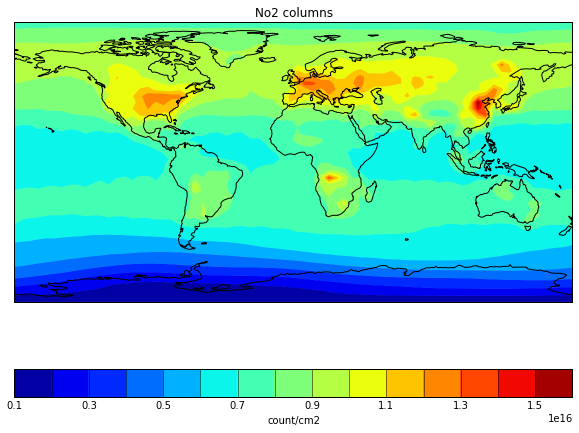

In [46]:
fig = plt.figure(figsize=(10, 8))
qplt.contourf(no2_avg_columns[0], 15)
plt.gca().coastlines()

A Hovmoller diagram example

/home/python/PythonEnvs/pygchem_gitmaster_py27/lib/python2.7/site-packages/iris/cube.py:2750: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


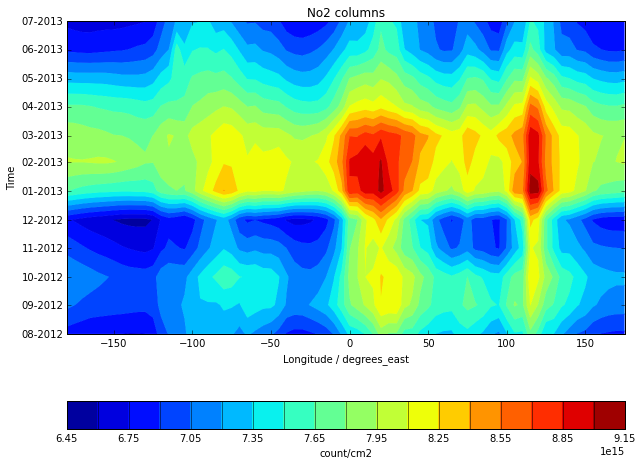

In [47]:
import matplotlib.dates as mdates

no2_hovmoller = no2_avg_columns.collapsed('latitude',
                                          iris.analysis.MEAN)

fig = plt.figure(figsize=(10, 8))
qplt.contourf(no2_hovmoller, 20)

# fine control over time axis ticks and labels
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gca().set_ylabel("Time")

## The CTM diagnostics

For loading datasets, Pygchem reads the information stored in the `diaginfo.dat` and `tracerinfo.dat` files. The module `pygchem.diagnostics` provides a basic API for reading / writing these files and handling their contents.  

In [48]:
from pygchem import diagnostics

To load a couple of files:

In [49]:
dinfo = diagnostics.CTMDiagnosticInfo(diaginfo_file='diaginfo.dat',
                                      tracerinfo_file='tracerinfo.dat')

A `CTMDiagnosticInfo` object contains all information stored in those files. The attributes `categories` and `diagnostics` contains each record (line) in `diaginfo.dat` and `tracerinfo.dat`, respectively 

In [50]:
dinfo.categories

,Key,CTMCategory
0,IJ-AVG-$,"CTMCategory(offset=0, name=IJ-AVG-$, description=Tracer concentration)"
1,IJ-24H-$,"CTMCategory(offset=0, name=IJ-24H-$, description=24-hr avg tracer conc.)"
2,INST-MAP,"CTMCategory(offset=0, name=INST-MAP, description=Instantaneous tracer)"
3,IJ-MAX-$,"CTMCategory(offset=0, name=IJ-MAX-$, description=Surface peak concentration)"
4,ANTHSRCE,"CTMCategory(offset=1000, name=ANTHSRCE, description=Anthropogenic emissions)"
5,BIOFSRCE,"CTMCategory(offset=1000, name=BIOFSRCE, description=Biofuel emissions)"
6,NO-AC-$,"CTMCategory(offset=1000, name=NO-AC-$, description=Aircraft NO)"
7,NO-AN-$,"CTMCategory(offset=1000, name=NO-AN-$, description=Anthropogenic NO)"
8,NO-BIOB,"CTMCategory(offset=1000, name=NO-BIOB, description=Biomass NO)"
9,NO-BIOF,"CTMCategory(offset=1000, name=NO-BIOF, description=Biofuel NO)"


These attributes behave like a Python list, with added key reference and database lookup-like capabilities. Each item of the list coorespond to a record.

In [51]:
# get the 1st category (a Record like object)
cat_ij_avg = dinfo.categories[0]
cat_ij_avg

CTMCategory(offset=0, name=IJ-AVG-$, description=Tracer concentration)

In [52]:
cat_ij_avg.name

'IJ-AVG-$'

In [53]:
cat_ij_avg.offset

0

In [54]:
# convert the record object to a dict
cat_ij_avg.to_dict()

{'description': 'Tracer concentration', 'name': 'IJ-AVG-$', 'offset': 0}

It is aslo possible to filter the data (queries):

In [55]:
# select a category based on its name (key)
dinfo.categories.select_item("NS-FLX-$")

CTMCategory(offset=3000, name=NS-FLX-$, description=N/S transport flux)

In [56]:
# select a diagnostic (tracer) based on its number (key)
dinfo.diagnostics.select_item(11)

CTMDiagnostic(number=11, name=ALD2, full_name=ALD2 tracer, unit=ppbC, scale=1000000000.0, chemical=True, molecular_weight=0.012, hydrocarbon=True, carbon_weight=2)

In [57]:
# select categories based on other attributes
dinfo.categories.select(offset=3000)

,Key,CTMCategory
0,CV-FLX-$,"CTMCategory(offset=3000, name=CV-FLX-$, description=Convective mass flux)"
1,TURBMC-$,"CTMCategory(offset=3000, name=TURBMC-$, description=PBL mixing mass flux)"
2,EW-FLX-$,"CTMCategory(offset=3000, name=EW-FLX-$, description=E/W transport flux)"
3,NS-FLX-$,"CTMCategory(offset=3000, name=NS-FLX-$, description=N/S transport flux)"
4,UP-FLX-$,"CTMCategory(offset=3000, name=UP-FLX-$, description=Up/down transport flux)"
5,STRT-FLX,"CTMCategory(offset=3000, name=STRT-FLX, description=Flux from stratosphere)"
6,RN--SRCE,"CTMCategory(offset=3000, name=RN--SRCE, description=Rn-Pb-Be source)"
7,RN-DECAY,"CTMCategory(offset=3000, name=RN-DECAY, description=Rn-Pb-Be loss)"
8,WETDCV-$,"CTMCategory(offset=3000, name=WETDCV-$, description=Conv wet scavenging)"
9,WETDLS-$,"CTMCategory(offset=3000, name=WETDLS-$, description=Wet deposition)"


In [58]:
# advanced selection
dinfo.diagnostics.select(lambda d: d.unit == 'ppbC' and d.number > 10)

,Key,CTMDiagnostic
0,11,"CTMDiagnostic(number=11, name=ALD2, full_name=ALD2 tracer, unit=ppbC, scale=1000000000.0, chemical=True, molecular_weight=0.012, hydrocarbon=True, carbon_weight=2)"
1,18,"CTMDiagnostic(number=18, name=PRPE, full_name=PRPE tracer, unit=ppbC, scale=1000000000.0, chemical=True, molecular_weight=0.012, hydrocarbon=True, carbon_weight=3)"
2,19,"CTMDiagnostic(number=19, name=C3H8, full_name=C3H8 tracer, unit=ppbC, scale=1000000000.0, chemical=True, molecular_weight=0.012, hydrocarbon=True, carbon_weight=3)"
3,21,"CTMDiagnostic(number=21, name=C2H6, full_name=C2H6 tracer, unit=ppbC, scale=1000000000.0, chemical=True, molecular_weight=0.012, hydrocarbon=True, carbon_weight=2)"


We can add or remove entries:

In [59]:
new_tracer = diagnostics.CTMDiagnostic(9999, 'NEW', full_name='a new tracer')

dinfo.diagnostics.append(new_tracer)

dinfo.diagnostics[-1]

CTMDiagnostic(number=9999, name=NEW, full_name=a new tracer, unit=unitless, scale=1.0, chemical=True, molecular_weight=0.0, hydrocarbon=False, carbon_weight=0)

In [60]:
# select the new tracer added to the list 
s = dinfo.diagnostics.select(9999)

# remove the selected entry
s.selection_remove()

dinfo.diagnostics[-1]

CTMDiagnostic(number=24004, name=N(AIR), full_name=Number density of air, unit=molec/m3, scale=1.0, chemical=False, molecular_weight=0.0, hydrocarbon=False, carbon_weight=1)

Exporting to diaginfo and tracerinfo files:

In [61]:
dinfo.save_diaginfo('diaginfo_test.dat')
dinfo.save_tracerinfo('tracerinfo_test.dat')

NotYetImplementedError: 